In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [68]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

In [69]:
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [71]:
data.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [72]:
for i in data.columns:
    print(data[i].value_counts())
    print('\n')

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64


 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype

In [73]:
data.shape

(32560, 15)

In [74]:
data['Education'] = data['Education'].str.replace('10th', 'Secondary')
data['Education'] = data['Education'].str.replace('11th', 'Secondary')
data['Education'] = data['Education'].str.replace('12th', 'Secondary')
data['Education'] = data['Education'].str.replace('1st-4th', 'Primary')
data['Education'] = data['Education'].str.replace('5th-6th', 'Primary')
data['Workclass'] = data['Workclass'].str.replace('Local-gov', 'Gov')
data['Workclass'] = data['Workclass'].str.replace('State-gov', 'Gov')
data['Workclass'] = data['Workclass'].str.replace('Federal-gov', 'Gov')

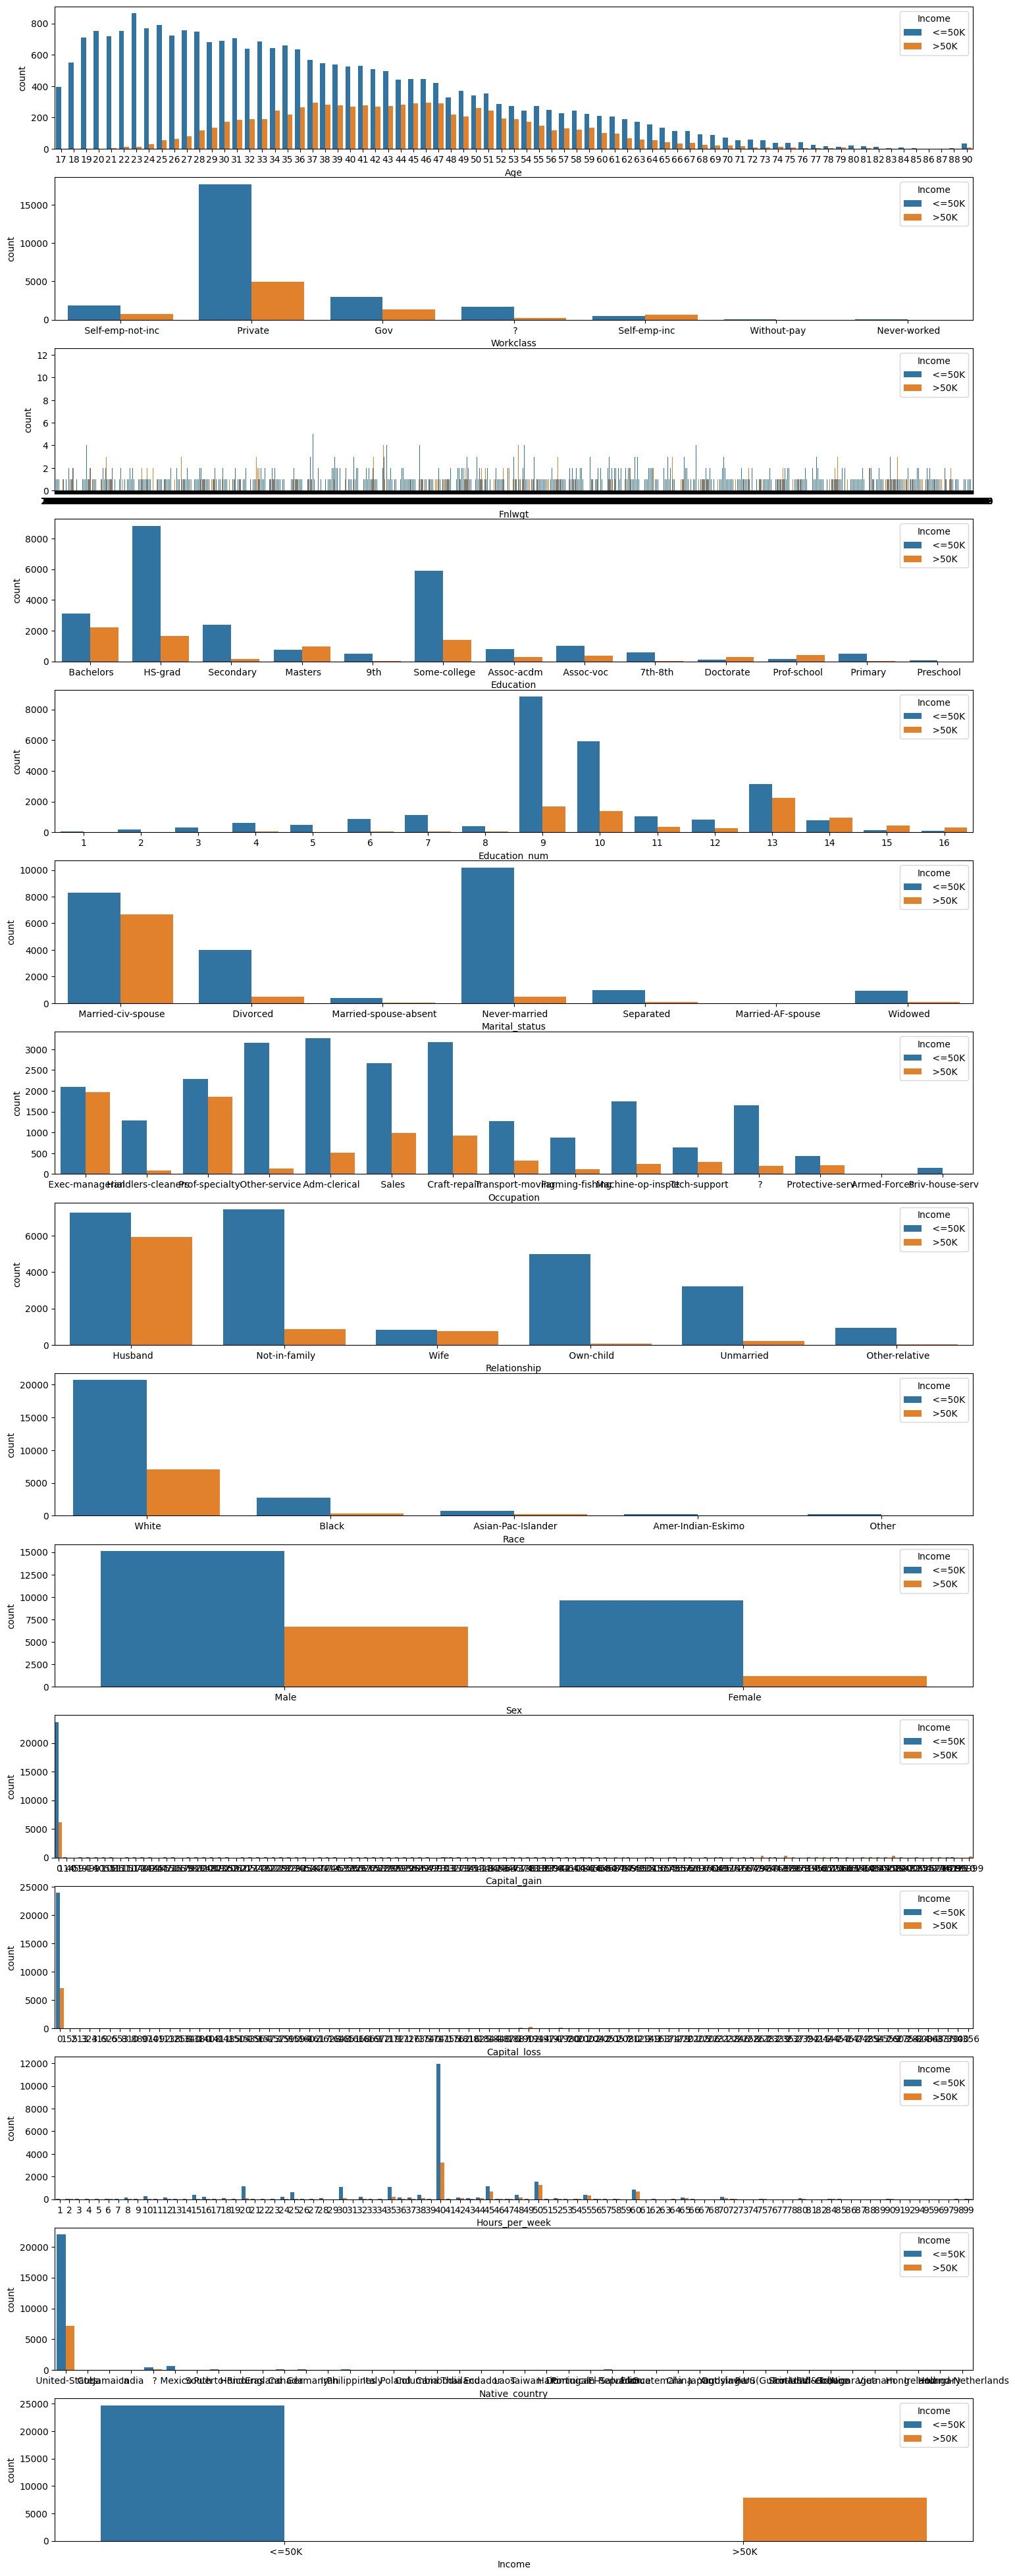

In [75]:
plt.figure(figsize = (18,50))
plotnumber = 1
for col in data.columns:
    if plotnumber<=15:
        ax = plt.subplot(15,1,plotnumber)
        sns.countplot(x = data[col], hue=data['Income'])
        plt.xlabel(col)
        plotnumber +=1

# Observations

**over 50K income is more likely if people are:**
*   in their 40s
*   have masters, doctorate or prof school degree and bachelors to some extent
* married and living with the partner
* have specialist or exec management job

In [76]:
from sklearn.preprocessing import LabelEncoder

In [77]:
le = LabelEncoder()
for col in data.columns:
  if data[col].dtype == 'object':
    data[col] = le.fit_transform(data[col])

In [78]:
data.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,2.755068,1.897818e+05,7.108784,10.080590,2.611794,6.572912,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.718796,0.240817
std,13.640642,1.154324,1.055498e+05,3.456827,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,7.823892,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,3.000000,1.178315e+05,4.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,3.000000,1.783630e+05,6.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,3.000000,2.370545e+05,11.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,6.000000,1.484705e+06,12.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


<Axes: >

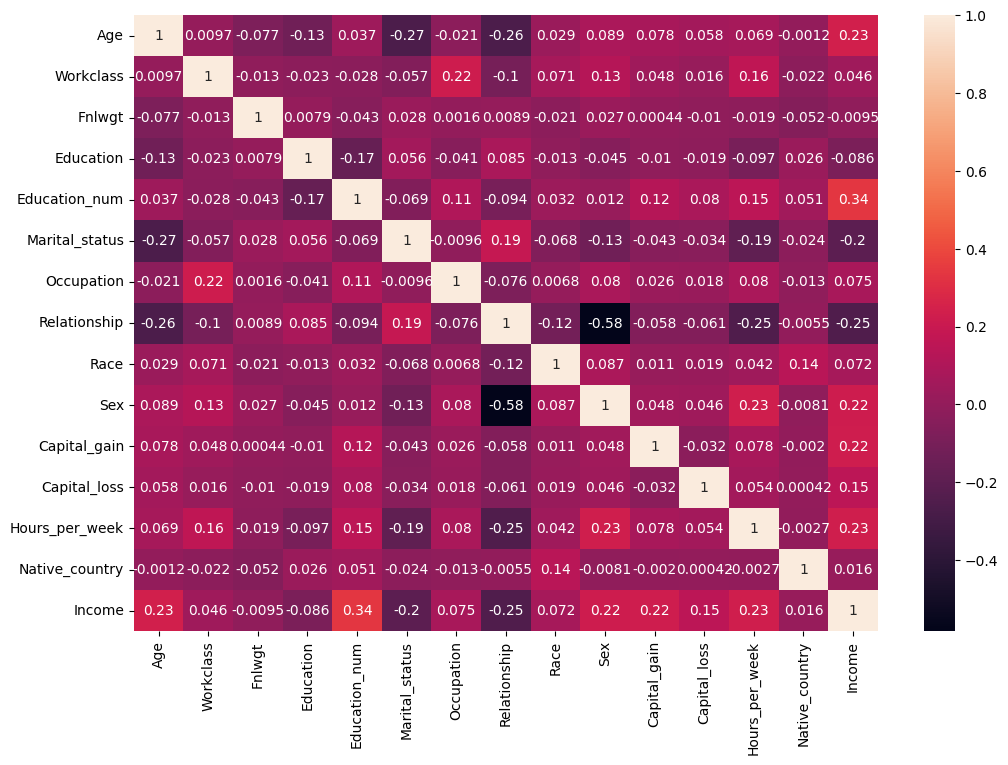

In [79]:
plt.figure(figsize = (12,8))
sns.heatmap(data.corr(), annot = True)

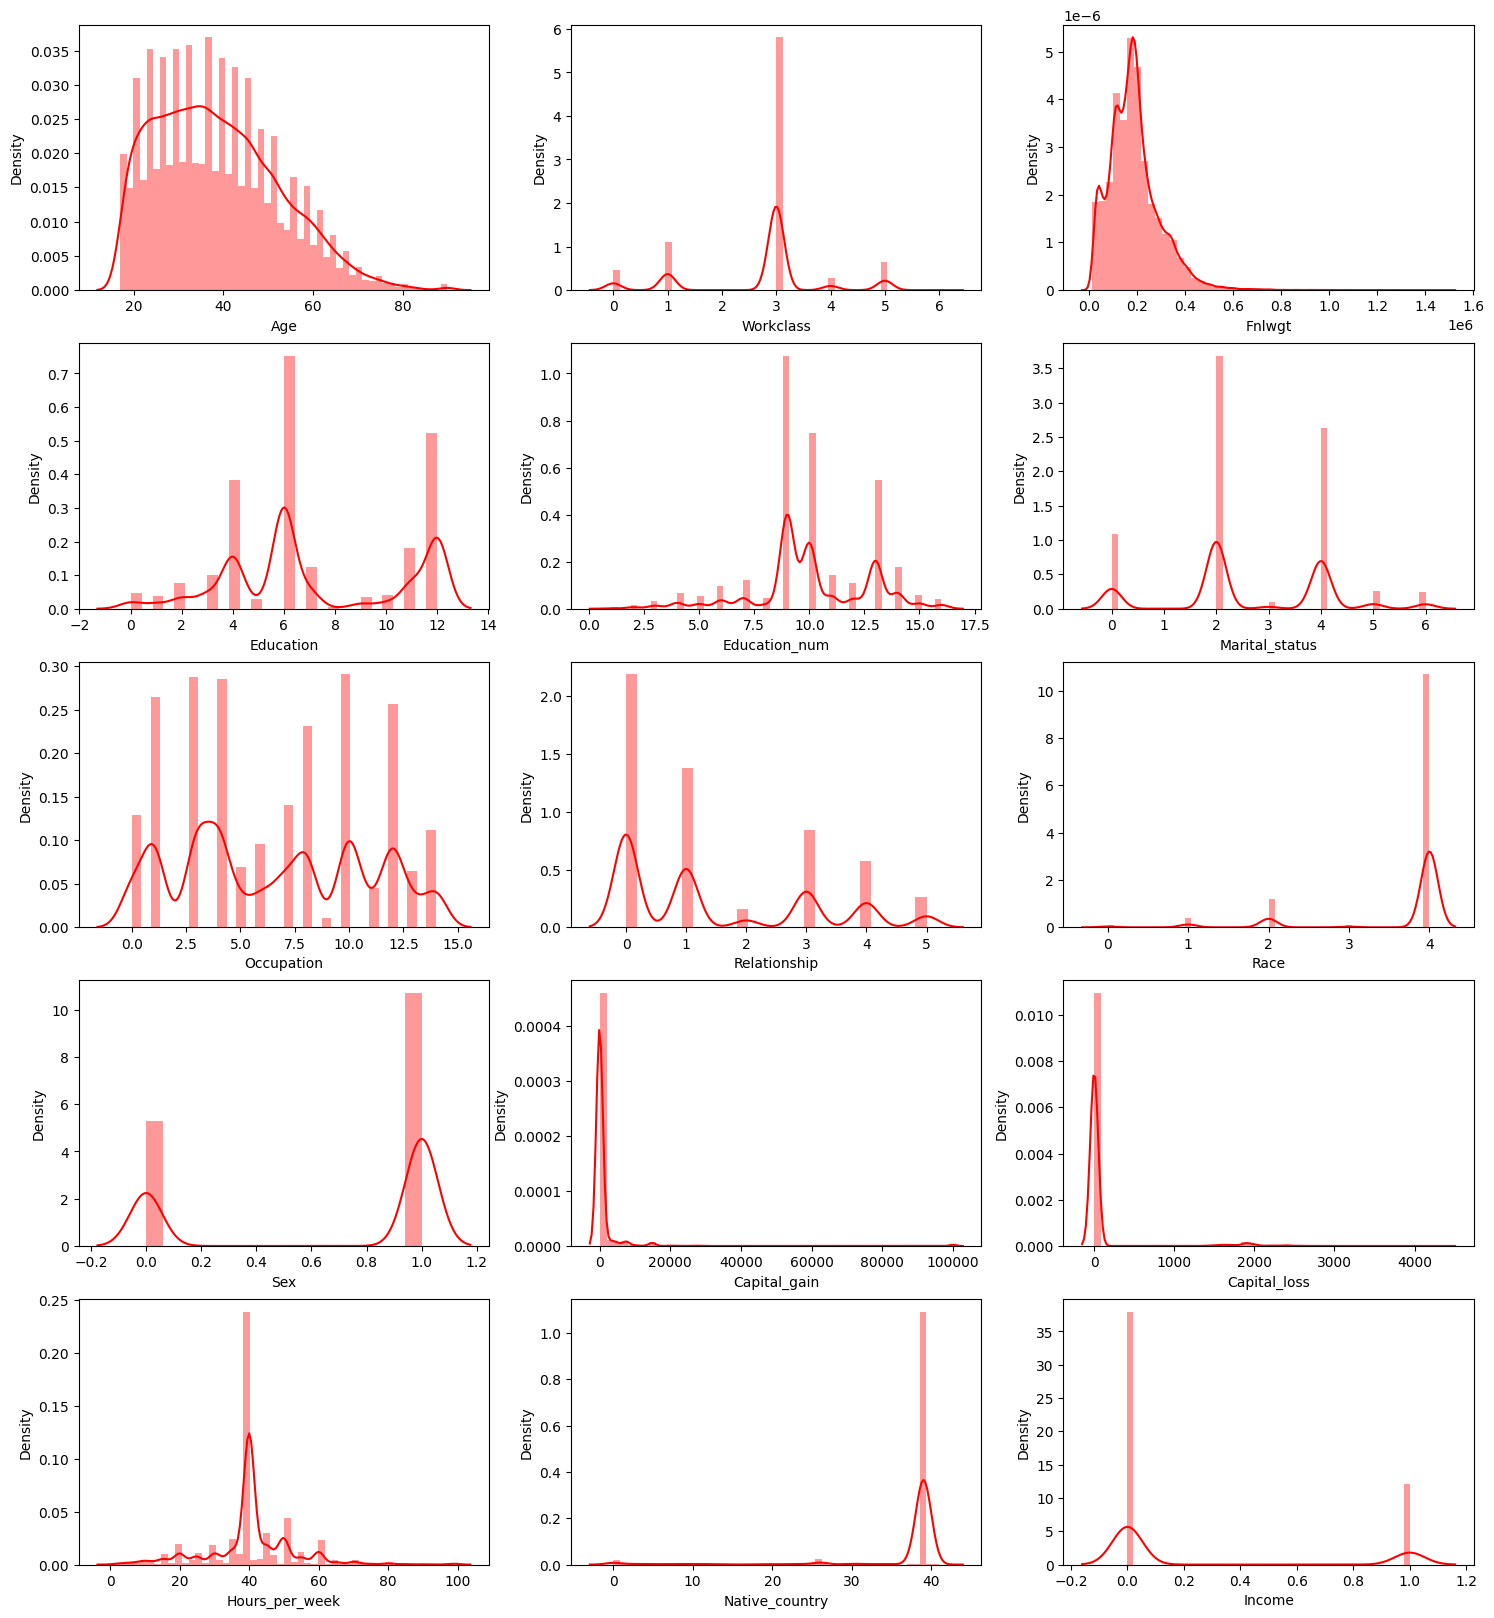

In [80]:
plt.figure(figsize = (18,20))
plotnumber = 1
for col in data.columns:
    if plotnumber<=15:
      ax = plt.subplot(5,3,plotnumber)
      sns.distplot(data[col], color='r')
      plt.xlabel(col)
      plotnumber +=1

In [81]:
data.skew()

Age                0.558738
Workclass         -0.603094
Fnlwgt             1.446972
Education          0.188724
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64

* there seem to be multicolinearity between relationship and sex columns
* there are lots of zero values in capital gain and capital loss which has caused skewness
* fnlwght seem to not have a strong relationship with target and can be dropped

In [65]:
data['Capital_gain'] = np.cbrt(data['Capital_gain'])
data['Capital_loss'] = np.cbrt(data['Capital_loss'])

In [82]:
data['Capital_gain'] = (data['Capital_gain']+1).apply(np.log)
data['Capital_loss'] = (data['Capital_loss']+1).apply(np.log)

In [83]:
data.skew()

Age               0.558738
Workclass        -0.603094
Fnlwgt            1.446972
Education         0.188724
Education_num    -0.311630
Marital_status   -0.013448
Occupation        0.114540
Relationship      0.786784
Race             -2.435332
Sex              -0.719244
Capital_gain      3.096803
Capital_loss      4.307460
Hours_per_week    0.227636
Native_country   -3.658235
Income            1.212383
dtype: float64

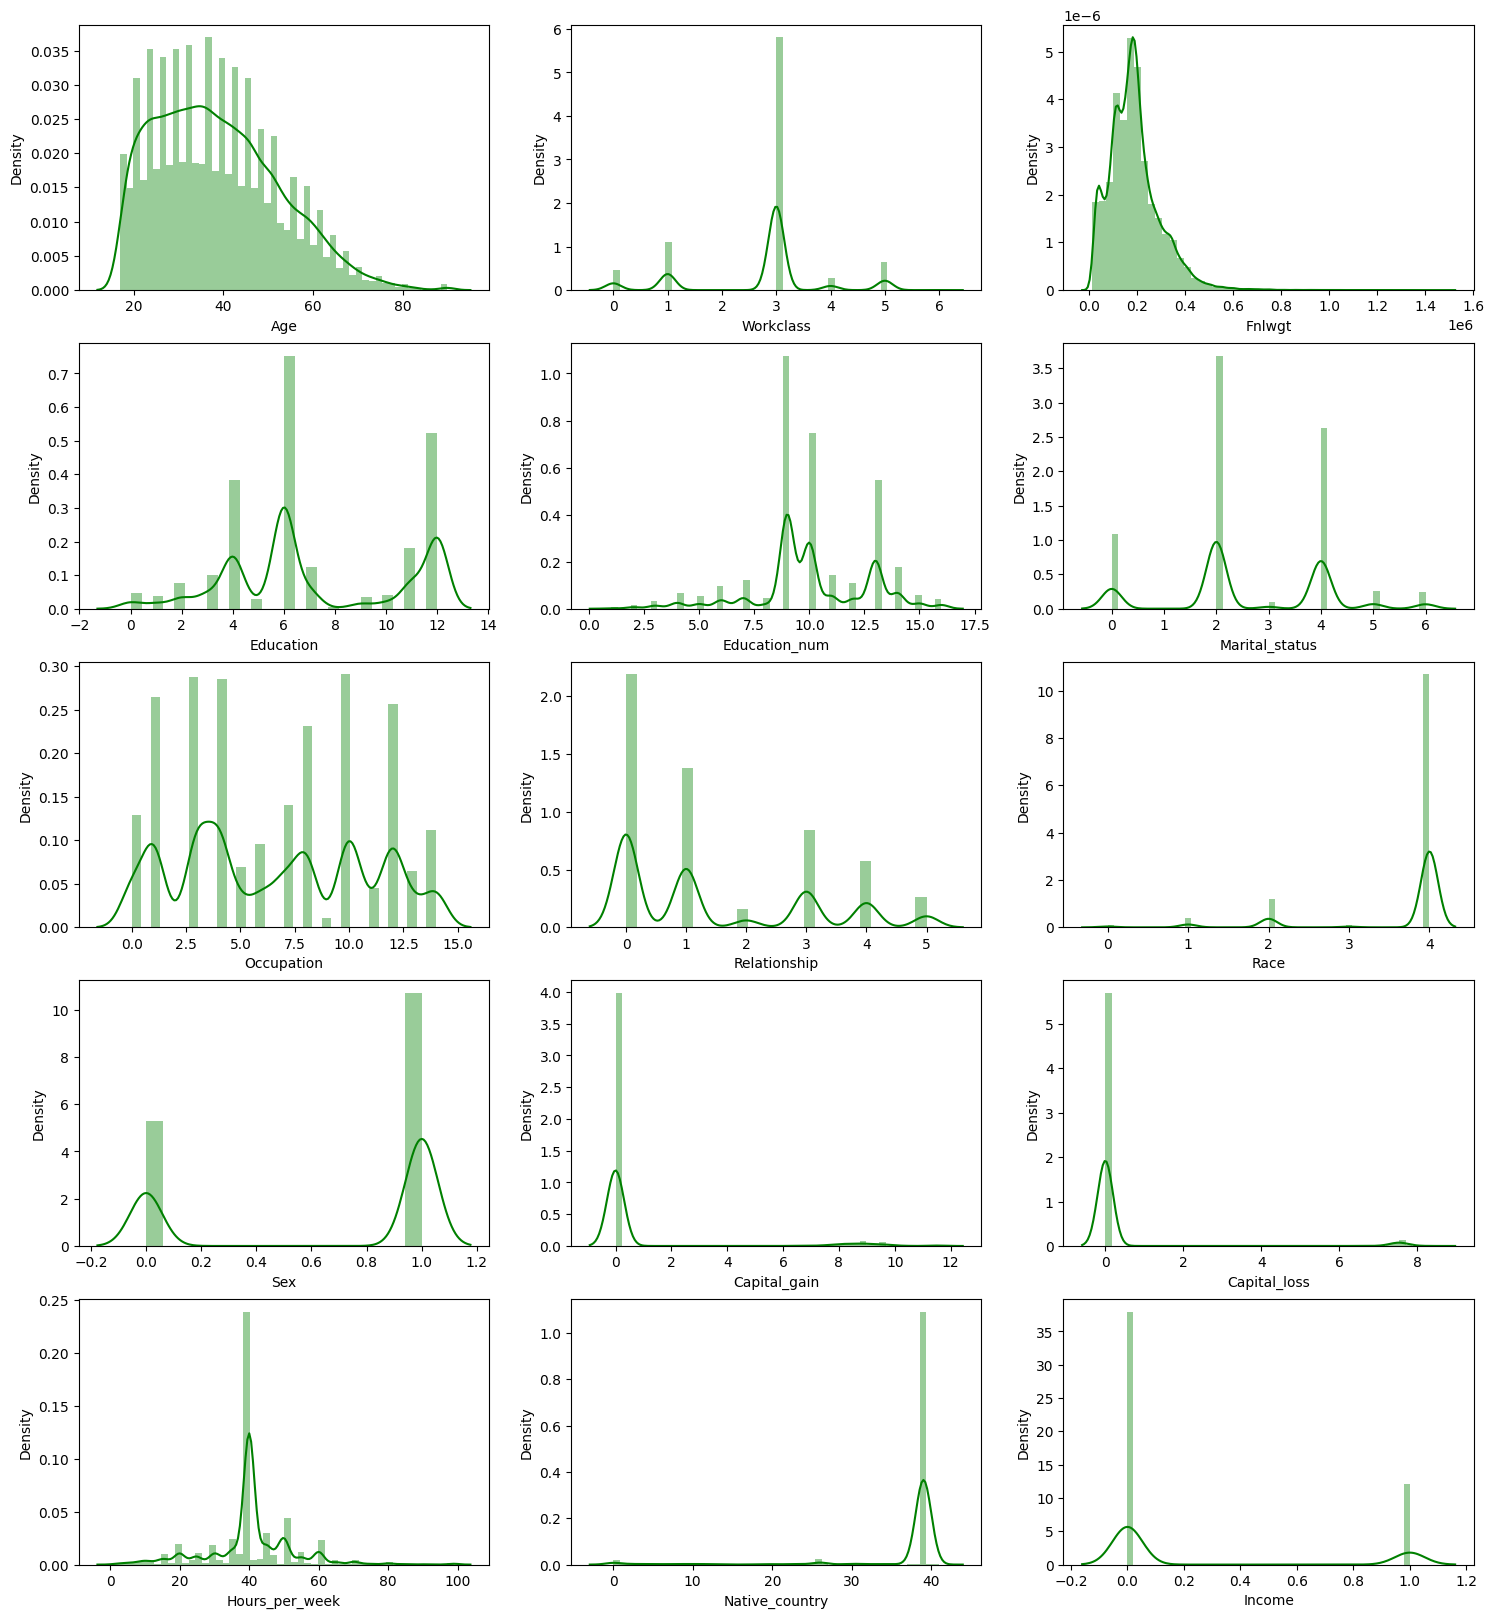

In [84]:
plt.figure(figsize = (18,20))
plotnumber = 1
for col in data.columns:
    if plotnumber<=15:
      ax = plt.subplot(5,3,plotnumber)
      sns.distplot(data[col], color='g')
      plt.xlabel(col)
      plotnumber +=1

In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
x = data.drop(['Income', 'Fnlwgt'], axis=1)
y = data['Income']

In [87]:
scaler = StandardScaler()

x_scaled = pd.DataFrame(scaler.fit_transform(x), columns= x.columns)

In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [89]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x_scaled.values,i) for i in range(len(x_scaled.columns))]
vif['Features'] = x_scaled.columns
vif

,VIF,Features
0,1.173983,Age
1,1.092061,Workclass
2,1.051372,Education
3,1.096464,Education_num
4,1.126231,Marital_status
5,1.070350,Occupation
6,1.683062,Relationship
7,1.040653,Race
8,1.560463,Sex
9,1.046443,Capital_gain


In [90]:
y.value_counts()

0    24719
1     7841
Name: Income, dtype: int64

In [91]:
from imblearn.over_sampling import SMOTE

In [92]:
sm = SMOTE()
x1, y1 = sm.fit_resample(x_scaled,y)

In [93]:
y1.value_counts()

0    24719
1    24719
Name: Income, dtype: int64

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [95]:
MaxAccu = 0
MaxRS = 0
for i in range(1,300):
  x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.30,random_state=i)
  LR = LogisticRegression()
  LR.fit(x_train,y_train)
  pred = LR.predict(x_test)
  acc = accuracy_score(y_test,pred)
  if acc > MaxAccu:
    MaxAccu = acc
    MaxRS = i
print('MAximum Accuracy:',MaxAccu,'\n', 'Best Random State:',MaxRS)

MAximum Accuracy: 0.7733279395900755 
 Best Random State: 261


In [96]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.30,random_state=MaxRS)

In [97]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn.model_selection import cross_val_score

**Random Forest**

In [98]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
RFCpred = RFC.predict(x_test)
print(accuracy_score(y_test,RFCpred))
print(confusion_matrix(y_test,RFCpred))
print(classification_report(y_test,RFCpred))

0.8901699029126213
[[6523  855]
 [ 774 6680]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      7378
           1       0.89      0.90      0.89      7454

    accuracy                           0.89     14832
   macro avg       0.89      0.89      0.89     14832
weighted avg       0.89      0.89      0.89     14832



**Logistic Regression**

In [99]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
LRpred = LR.predict(x_test)
print(accuracy_score(y_test,LRpred))
print(confusion_matrix(y_test,LRpred))
print(classification_report(y_test,LRpred))

0.7733279395900755
[[5667 1711]
 [1651 5803]]
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      7378
           1       0.77      0.78      0.78      7454

    accuracy                           0.77     14832
   macro avg       0.77      0.77      0.77     14832
weighted avg       0.77      0.77      0.77     14832



**Support Vector**

In [100]:
svc = SVC()
svc.fit(x_train,y_train)
svcpred = svc.predict(x_test)
print(accuracy_score(y_test,svcpred))
print(confusion_matrix(y_test,svcpred))
print(classification_report(y_test,svcpred))

0.8378505933117584
[[5725 1653]
 [ 752 6702]]
              precision    recall  f1-score   support

           0       0.88      0.78      0.83      7378
           1       0.80      0.90      0.85      7454

    accuracy                           0.84     14832
   macro avg       0.84      0.84      0.84     14832
weighted avg       0.84      0.84      0.84     14832



**Gradient Boosting**

In [101]:
GBC = GradientBoostingClassifier()
GBC.fit(x_train,y_train)
GBCpred = GBC.predict(x_test)
print(accuracy_score(y_test,GBCpred))
print(confusion_matrix(y_test,GBCpred))
print(classification_report(y_test,GBCpred))

0.8616504854368932
[[6106 1272]
 [ 780 6674]]
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      7378
           1       0.84      0.90      0.87      7454

    accuracy                           0.86     14832
   macro avg       0.86      0.86      0.86     14832
weighted avg       0.86      0.86      0.86     14832



**Bagging**

In [102]:
BC = BaggingClassifier()
BC.fit(x_train,y_train)
BCpred = BC.predict(x_test)
print(accuracy_score(y_test,BCpred))
print(confusion_matrix(y_test,BCpred))
print(classification_report(y_test,BCpred))

0.8789104638619202
[[6529  849]
 [ 947 6507]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      7378
           1       0.88      0.87      0.88      7454

    accuracy                           0.88     14832
   macro avg       0.88      0.88      0.88     14832
weighted avg       0.88      0.88      0.88     14832



**Cross Validation**

In [103]:
score = cross_val_score(RFC, x1,y1)
print(score)
print(score.mean())
print('Difference Between score mean and accuracy score:', accuracy_score(y_test,RFCpred)-score.mean())

[0.82311893 0.86579693 0.91605987 0.92333367 0.92211996]
0.8900858708257682
Difference Between score mean and accuracy score: 8.403208685314745e-05


In [104]:
score1 = cross_val_score(LR, x1,y1)
print(score1)
print(score1.mean())
print('Difference Between score mean and accuracy score:', accuracy_score(y_test,LRpred)-score1.mean())

[0.76001214 0.76527104 0.76941748 0.76989987 0.76777587]
0.7664752766127794
Difference Between score mean and accuracy score: 0.006852662977296142


In [105]:
score2 = cross_val_score(svc, x1,y1)
print(score2)
print(score2.mean())
print('Difference Between score mean and accuracy score:', accuracy_score(y_test,svcpred)-score2.mean())

[0.82615291 0.8279733  0.84152508 0.84069991 0.83938505]
0.8351472509093861
Difference Between score mean and accuracy score: 0.002703342402372244


In [106]:
score3 = cross_val_score(GBC, x1,y1)
print(score3)
print(score3.mean())
print('Difference Between score mean and accuracy score:', accuracy_score(y_test,GBCpred)-score3.mean())

[0.82605178 0.84921117 0.87186489 0.87094164 0.87134621]
0.8578831368902252
Difference Between score mean and accuracy score: 0.003767348546667937


In [107]:
score4 = cross_val_score(BC, x1,y1)
print(score4)
print(score4.mean())
print('Difference Between score mean and accuracy score:', accuracy_score(y_test,BCpred)-score4.mean())

[0.79449838 0.84466019 0.90898058 0.91635481 0.91119652]
0.8751380977210766
Difference Between score mean and accuracy score: 0.0037723661408435305


Random forest is the best model

In [108]:
from sklearn import metrics

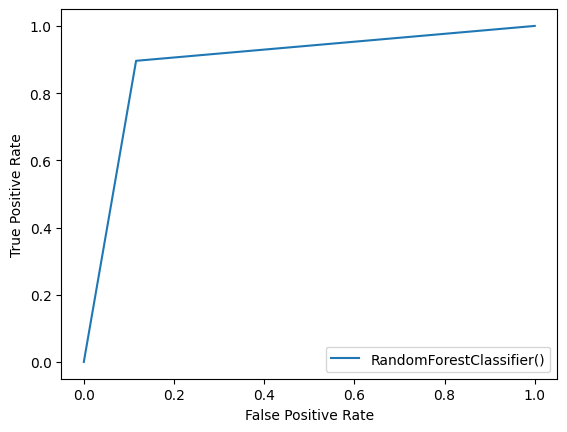

In [109]:
fpr,tpr,thresholds = metrics.roc_curve(y_test,RFCpred)
roc_auc = metrics.auc(fpr,tpr)
rfcurve = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, estimator_name = RFC)
rfcurve.plot()

In [110]:
from sklearn.model_selection import GridSearchCV

**Hyperparameter Tuning**

In [111]:
param = {'criterion':['gini', 'entropy', 'log_loss'],'max_features':['sqrt', 'log2', 'None'],'max_depth': [1, 3, 10, 50,100]}
gscv = GridSearchCV(RFC,param,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 3, 10, 50, 100],
                         'max_features': ['sqrt', 'log2', 'None']})

In [112]:
gscv.best_params_

{'criterion': 'log_loss', 'max_depth': 100, 'max_features': 'log2'}

In [113]:
model = RandomForestClassifier(criterion= 'log_loss', max_depth= 100, max_features= 'log2')
model.fit(x_train,y_train)
pred = model.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8899002157497303
[[6518  860]
 [ 773 6681]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      7378
           1       0.89      0.90      0.89      7454

    accuracy                           0.89     14832
   macro avg       0.89      0.89      0.89     14832
weighted avg       0.89      0.89      0.89     14832



In [114]:
import joblib

In [115]:
joblib.dump(model,'income.pk1')

['income.pk1']

In [116]:
df = pd.DataFrame()
actual = np.array(y_test)
df['Actual'] = actual
df['Prediction'] = pred
df

,Actual,Prediction
0,0,1
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
14827,1,1
14828,0,0
14829,0,0
14830,0,0
